<a href="https://colab.research.google.com/github/Deekshith0010/Content-Moderation-System/blob/main/contentmoderation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Dataset

In [ ]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Text Dataset/train.csv')

# Step 3: Display the first few rows of the dataset
df.head()


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# Step 4: Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [ ]:
# Step 5: Check for null/missing values
df.isnull().sum()

,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
# Step 6: View all column names
df.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

TEXT PREPROCESSING

In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 7: Define text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newline
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    return text


In [ ]:
# Step 8: Apply text cleaning to comment column
df['comment_text'] = df['comment_text'].astype(str).apply(clean_text)

In [ ]:

# Step 9: Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(df['comment_text'])

In [ ]:

# Step 10: Select target labels
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 11: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 12: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 13: Predict on test data
y_pred = model.predict(X_test)

# Step 14: Evaluate the model
print(classification_report(y_test, y_pred, target_names=y.columns))



               precision    recall  f1-score   support

        toxic       0.85      0.68      0.75      3056
 severe_toxic       0.41      0.06      0.11       321
      obscene       0.85      0.72      0.78      1715
       threat       0.60      0.12      0.20        74
       insult       0.75      0.57      0.65      1614
identity_hate       0.59      0.09      0.16       294

    micro avg       0.82      0.60      0.70      7074
    macro avg       0.67      0.37      0.44      7074
 weighted avg       0.79      0.60      0.68      7074
  samples avg       0.06      0.05      0.05      7074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Just use X_test directly, no need to transform again
y_pred = model.predict(X_test)

# Continue with evaluation
from sklearn.metrics import accuracy_score, classification_report

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("🔹 Overall Accuracy:", accuracy)





🔹 Overall Accuracy: 0.9153689487701707


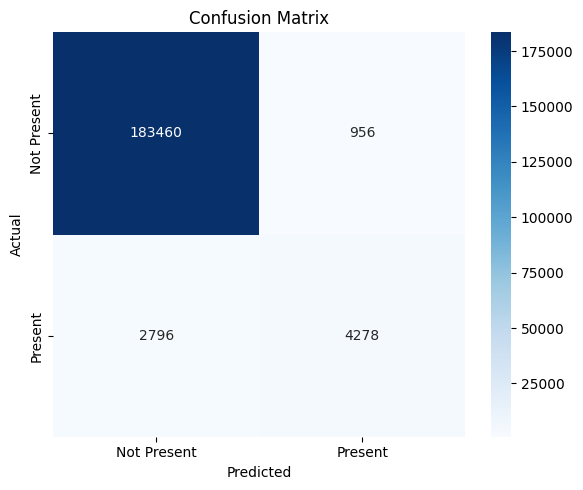

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten if needed
y_true_flat = y_test.to_numpy().flatten() if hasattr(y_test, 'to_numpy') else y_test.flatten()
y_pred_flat = y_pred.flatten()

# Confusion matrix
cm = confusion_matrix(y_true_flat, y_pred_flat)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Present', 'Present'],
            yticklabels=['Not Present', 'Present'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()







In [ ]:
import joblib

# Step 15: Save the trained model and vectorizer
joblib.dump(model, 'toxic_comment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
!find /content -name "*.pkl"


/content/tfidf_vectorizer.pkl
/content/toxic_comment_model.pkl


In [ ]:
from google.colab import files

files.download('/content/toxic_comment_model.pkl')
files.download('/content/tfidf_vectorizer.pkl')






<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Use the Model to Predict New Comments

In [ ]:
import joblib
import re

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load the model and vectorizer
model = joblib.load('toxic_comment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Define labels manually
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

def predict_comment(comment):
    # Preprocess input
    comment_clean = preprocess_text(comment)
    comment_vec = vectorizer.transform([comment_clean])

    # Predict
    prediction = model.predict(comment_vec)[0]

    # Get only labels where prediction is True
    result = [label for i, label in enumerate(labels) if prediction[i]]

    if result:
        return "Detected categories: " + ", ".join(result)
    else:
        return "No toxic content detected."




In [ ]:
print(predict_comment("You are such an idiot!"))



Detected categories: toxic, insult


In [ ]:
print(predict_comment("I will find you and hurt you, you dirty creature!"))


Detected categories: toxic


In [ ]:
print(predict_comment("Hello"))


No toxic content detected.


**IMAGE**

In [ ]:
#  Install required libraries if not already installed
!pip install torch torchvision matplotlib

# 🔧 Import necessary modules
import os
import torch
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
#  Image transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}


In [ ]:
# Define directory path
data_dir = '/content/drive/MyDrive/Datasets/Image Dataset/split'


#  Load datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}

#  Dataloaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=2)
               for x in ['train', 'val', 'test']}

#  Class names
class_names = image_datasets['train'].classes
print("Classes:", class_names)


Classes: ['non_violence', 'violence']


In [ ]:
#  Load ResNet50 pretrained on ImageNet
resnet = models.resnet50(pretrained=True)

#  Freeze all layers (we only train the final classifier)
for param in resnet.parameters():
    param.requires_grad = False

#  Modify final layer to match your number of classes
num_classes = len(class_names)
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 143MB/s]


In [ ]:
#  Loss function
criterion = nn.CrossEntropyLoss()

#  Optimizer only for final layer
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001)

#  Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)


In [ ]:
num_epochs = 5  # You can increase this later

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 30)

    for phase in ['train', 'val']:
        if phase == 'train':
            resnet.train()
        else:
            resnet.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = resnet(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")


Epoch 1/5
------------------------------
train Loss: 0.3631 Acc: 0.8387
val Loss: 0.2496 Acc: 0.9049
Epoch 2/5
------------------------------
train Loss: 0.2561 Acc: 0.8968
val Loss: 0.2441 Acc: 0.9049
Epoch 3/5
------------------------------
train Loss: 0.2256 Acc: 0.9079
val Loss: 0.1995 Acc: 0.9199
Epoch 4/5
------------------------------
train Loss: 0.2308 Acc: 0.9052
val Loss: 0.1891 Acc: 0.9284
Epoch 5/5
------------------------------
train Loss: 0.2169 Acc: 0.9120
val Loss: 0.1847 Acc: 0.9350


In [ ]:
# Save the model state dictionary
torch.save(resnet.state_dict(), 'resnet50_violence_classification.pth')
print(" Model saved as 'resnet50_violence_classification.pth'")


 Model saved as 'resnet50_violence_classification.pth'


In [ ]:
resnet.load_state_dict(torch.load('resnet50_violence_classification.pth'))
resnet.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
!find /content -name "*.pth"

/content/resnet50_violence_classification.pth


In [ ]:
from google.colab import files

files.download('/content/resnet50_violence_classification.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Classification Report:
              precision    recall  f1-score   support

non_violence       0.90      0.95      0.92       785
    violence       0.95      0.90      0.93       877

    accuracy                           0.93      1662
   macro avg       0.93      0.93      0.93      1662
weighted avg       0.93      0.93      0.93      1662



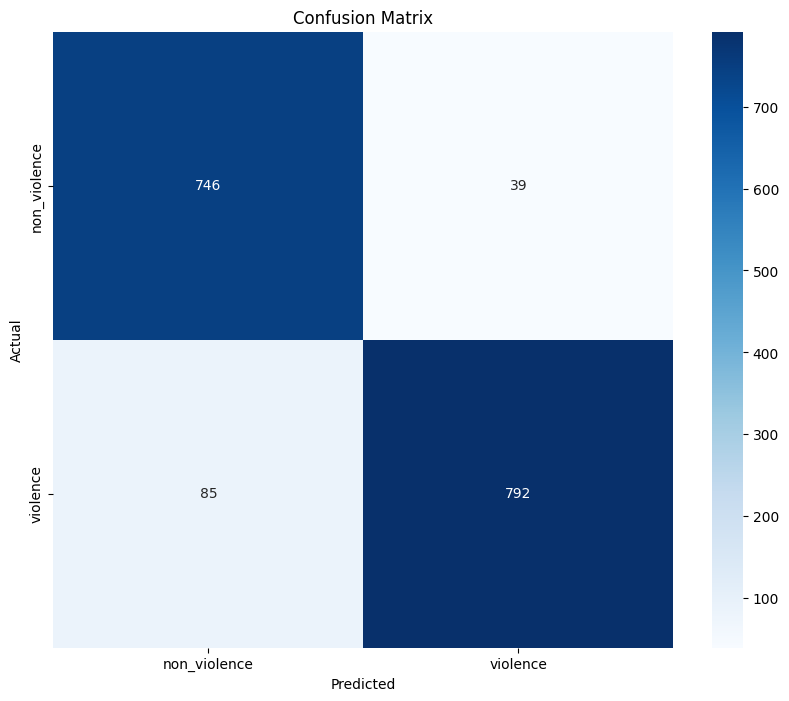

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

resnet.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#  Classification Report
print(" Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

#  Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving watch-ufc-fight-night-692036452.webp to watch-ufc-fight-night-692036452.webp


In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define image transformations (must match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust if you used different size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet mean
                         [0.229, 0.224, 0.225])   # ImageNet std
])

# Define class names
class_names = ['Non Violence', 'Violence']  # Order must match your folder order during training

# Function to predict class of a single image
def predict_image(image_path, model, class_names):
    model.eval()  # Set model to eval mode
    image = Image.open(image_path).convert('RGB')  # Handle palette warning
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        outputs = model(image_tensor.to(next(model.parameters()).device))
        _, predicted = torch.max(outputs, 1)
        return class_names[predicted.item()]

# Load your trained model
import torchvision.models as models

resnet = models.resnet18(pretrained=False)
num_ftrs = resnet.fc.in_features
resnet.fc = torch.nn.Linear(num_ftrs, 2)  # 2 classes: Violence, Non Violence
resnet.load_state_dict(torch.load('resnet50_violence_classification.pth', map_location=torch.device('cpu')))
resnet.eval()

# Predict a new image
image_path = r"/content/watch-ufc-fight-night-692036452.webp"  # Replace with your actual path
predicted_class = predict_image(image_path, resnet, class_names)
print(f"Predicted class: {predicted_class}")



Predicted class: Violence


VIDEO **CONTENT**

In [ ]:
!pip install opencv-python


In [ ]:
import os
import re
from glob import glob
from PIL import Image
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
import cv2


In [ ]:
# Enable fast convolution algorithms
torch.backends.cudnn.benchmark = True

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
feature_dim = 2048
hidden_dim = 128
num_classes = 2
sequence_length = 10
batch_size = 4  # You can try 8 if GPU has enough memory

In [ ]:
# Label mapping
label_map = {"NonViolence": 0, "Violence": 1}
class_names = ["NonViolence", "Violence"]

# Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
# Dataset
class VideoFrameDataset(Dataset):
    def __init__(self, root_dir, transform, sequence_length=10):
        self.sequence_length = sequence_length
        self.transform = transform
        self.samples = []

        for label_name in ['NonViolence', 'Violence']:
            label_path = os.path.join(root_dir, label_name)
            all_images = sorted(glob(os.path.join(label_path, "*.jpg")))

            videos = {}
            for img_path in all_images:
                basename = os.path.basename(img_path)
                match = re.match(r"(vid\d+)_\d+\.jpg", basename)
                if match:
                    vid_key = match.group(1)
                    videos.setdefault(vid_key, []).append(img_path)

            for vid_key, frames in videos.items():
                if len(frames) >= sequence_length:
                    selected = frames[:sequence_length]
                    self.samples.append((selected, label_map[label_name]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        frame_paths, label = self.samples[idx]
        frames = [self.transform(Image.open(fp).convert("RGB")) for fp in frame_paths]
        frames = torch.stack(frames)
        return frames, label

In [ ]:
# Load datasets
base_path = "/content/drive/MyDrive/Datasets/Video Dataset/frames"
train_dataset = VideoFrameDataset(os.path.join(base_path, "train"), transform)
val_dataset = VideoFrameDataset(os.path.join(base_path, "val"), transform)
test_dataset = VideoFrameDataset(os.path.join(base_path, "test"), transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=2, pin_memory=True)

In [ ]:
# Model
class CNNLSTMModel(nn.Module):
    def __init__(self, feature_dim, hidden_dim, num_classes):
        super(CNNLSTMModel, self).__init__()
        base_model = models.resnet50(pretrained=True)
        self.cnn = nn.Sequential(*list(base_model.children())[:-1])  # Remove final FC
        self.lstm = nn.LSTM(input_size=feature_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

        # Freeze CNN for faster training
        for param in self.cnn.parameters():
            param.requires_grad = False

    def forward(self, x):
        B, T, C, H, W = x.shape
        x = x.view(-1, C, H, W)
        with torch.no_grad():
            features = self.cnn(x).view(B, T, -1)
        lstm_out, _ = self.lstm(features)
        return self.fc(lstm_out[:, -1, :])

In [ ]:
# Instantiate model
model = CNNLSTMModel(feature_dim, hidden_dim, num_classes).to(device)

# Class imbalance handling
counts = Counter([label for _, label in train_dataset.samples])
weights = torch.tensor([1.0 / counts[i] for i in range(num_classes)], dtype=torch.float).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Evaluation
def evaluate_model(model, loader):
    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            targets.extend(labels.cpu().numpy())
    print(classification_report(targets, preds, target_names=class_names))


In [ ]:
# Training loop
def train(model, train_loader, val_loader, criterion, optimizer, device, epochs=10):
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"[Epoch {epoch+1}/{epochs}] Training Loss: {total_loss:.4f}")

        # Validation step
        print("Validation Evaluation:")
        model.eval()  # Set model to evaluation mode
        evaluate_model(model, val_loader)
        model.train()  # Switch back to training mode for next epoch


In [ ]:
# Run training
train(model, train_loader, val_loader, criterion, optimizer, device, epochs=5)


[Epoch 1/5] Training Loss: 153.1385
Validation Evaluation:
              precision    recall  f1-score   support

 NonViolence       0.87      0.90      0.88       150
    Violence       0.90      0.86      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[Epoch 2/5] Training Loss: 139.2667
Validation Evaluation:
              precision    recall  f1-score   support

 NonViolence       0.91      0.92      0.91       150
    Violence       0.92      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

[Epoch 3/5] Training Loss: 132.8633
Validation Evaluation:
              precision    recall  f1-score   support

 NonViolence       0.94      0.89      0.91       150
    Violence       0.90      0.94      0.92       150

    a

In [ ]:
# Save the trained model
torch.save(model.state_dict(), "violence_cnn_lstm_model.pth")
print("Model saved successfully.")


Model saved successfully.


In [ ]:
from google.colab import files
files.download('violence_cnn_lstm_model.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


# Redefine model with same architecture
model = CNNLSTMModel(feature_dim=2048, hidden_dim=128, num_classes=2).to(device)

# Load saved weights
model.load_state_dict(torch.load("violence_cnn_lstm_model.pth"))

# Set model to evaluation mode
model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CNNLSTMModel(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64,

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, loader):
    model.eval()
    preds, targets = [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            targets.extend(labels.cpu().numpy())

    # Print classification report
    print(classification_report(targets, preds, target_names=["NonViolence", "Violence"]))

    # Print accuracy
    acc = accuracy_score(targets, preds)
    print(f" Accuracy: {acc * 100:.2f}%")


In [ ]:
evaluate_model(model, val_loader)  # or test_loader


              precision    recall  f1-score   support

 NonViolence       0.88      0.95      0.91       150
    Violence       0.95      0.87      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

✅ Accuracy: 91.00%


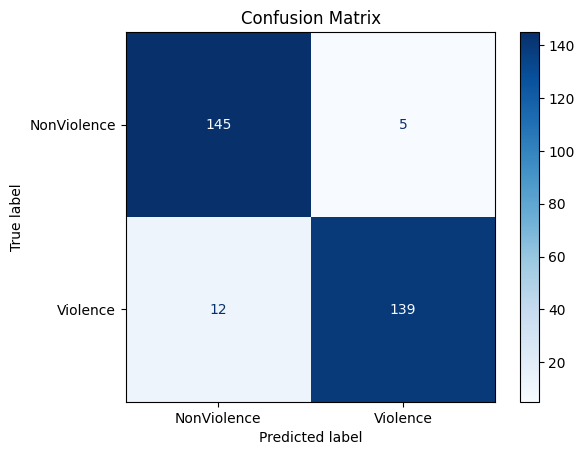

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, loader, class_names):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', values_format='d')
    import matplotlib.pyplot as plt
    plt.title("Confusion Matrix")
    plt.show()

# Use like this:
class_names = ['NonViolence', 'Violence']
plot_confusion_matrix(model, test_loader, class_names)


In [ ]:
#Testing
def extract_frames(video_path, output_dir, max_frames=10):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        out_path = os.path.join(output_dir, f"frame_{frame_count:03d}.jpg")
        cv2.imwrite(out_path, frame)
        frame_count += 1

    cap.release()


In [ ]:
def predict_video(model, frame_dir, transform, sequence_length=10):
    model.eval()
    frame_paths = sorted(glob(os.path.join(frame_dir, "*.jpg")))[:sequence_length]

    if len(frame_paths) < sequence_length:
        print(f"Only found {len(frame_paths)} frames, expected at least {sequence_length}")
        return

    frames = [transform(Image.open(fp).convert("RGB")) for fp in frame_paths]
    input_tensor = torch.stack(frames).unsqueeze(0).to(device)  # (1, T, C, H, W)

    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted = torch.max(outputs, 1)

    return predicted.item()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving V_6.mp4 to V_6.mp4


In [ ]:


#  Test a new video
extract_frames("/content/V_6.mp4", "temp_frames")  # Adjust path
pred = predict_video(model, "temp_frames", transform)
print("Predicted class:", class_names[pred])


Predicted class: Violence
